### Student Details

Student name: **Siddharth Prince**

Student ID: **23052058**

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [1]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]   
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [2]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

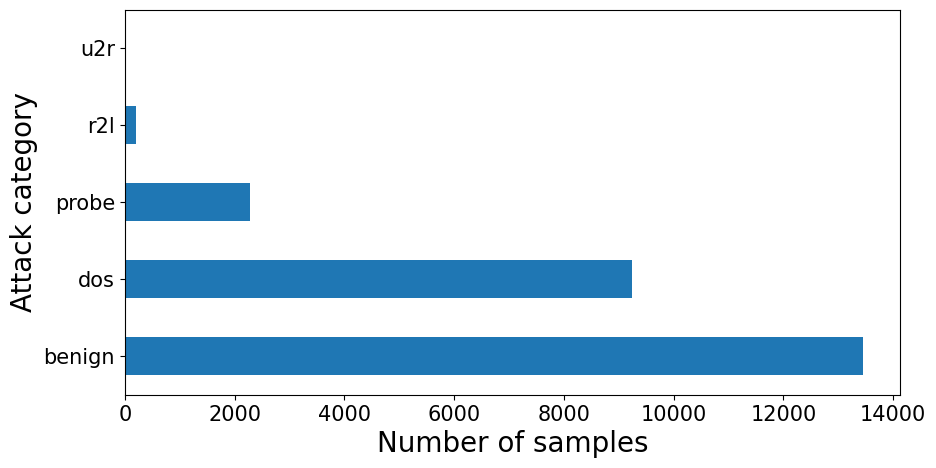

In [3]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.fit_transform(test_X)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Training an SVM model on the scaled training data
model = SVC(kernel='linear')
model.fit(train_X_scaled, train_Y)

SVC(kernel='linear')

In [6]:
# Predicting the results for our test data.
preds = model.predict(test_X_scaled)

# Calculating the accuracy score for our model's predictions
print(f'Accuracy score: {accuracy_score(test_Y, preds)*100:.2f}%')

Accuracy score: 73.66%


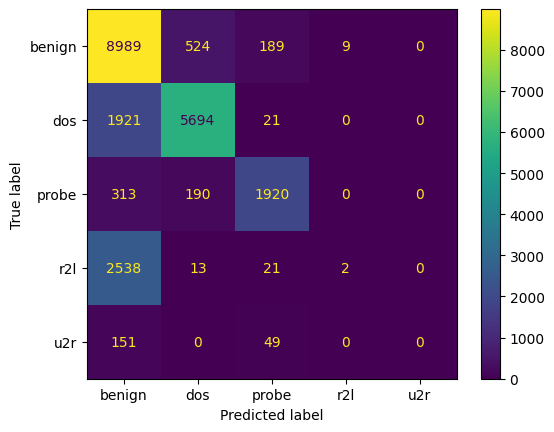

In [7]:
# Generating the confusion matrix for our predictions
confusion_matrix = confusion_matrix(test_Y, preds, labels=model.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [8]:
# Looking at some more metrics to see the model's performance
from sklearn.metrics import classification_report

print(classification_report(test_Y, preds, labels=model.classes_, zero_division=False))

              precision    recall  f1-score   support

      benign       0.65      0.93      0.76      9711
         dos       0.89      0.75      0.81      7636
       probe       0.87      0.79      0.83      2423
         r2l       0.18      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.74     22544
   macro avg       0.52      0.49      0.48     22544
weighted avg       0.69      0.74      0.69     22544



<span style="color:red">Insert your text answers below</span>.

### Observations:
- The confusion matrix above shows that while there are a good number of true positives and negatives, there are also a significant number of false positives and negatives.
- The 'dos' and 'r2l' attack vectors have particularly been misclassified for many of the test data points to be benin which would be a false negative which means our model would not detect a large chunk of the attacks which is a huge problem. If you ask me, it is better to err on the side of caution and hence false positives, while annoying, aren't the worst outcomes here compared to a high number of false negatives.
- Also, interestingly, the attack vector, 'u2r' (which also has the lowest number of data points in the data set) has all of its predictions to be false negatives. The model did not get a single correct prediction for this attack type which is concerning.

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Scaling original data using MinMaxScaler
minMaxScaler = MinMaxScaler()
train_X_minMaxed = minMaxScaler.fit_transform(train_X)
display(train_X_minMaxed)
print(np.shape(train_X_minMaxed))

array([[0.00000000e+00, 1.28631990e-06, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-02, 0.00000000e+00],
       [0.00000000e+00, 3.82490236e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

(25192, 31)


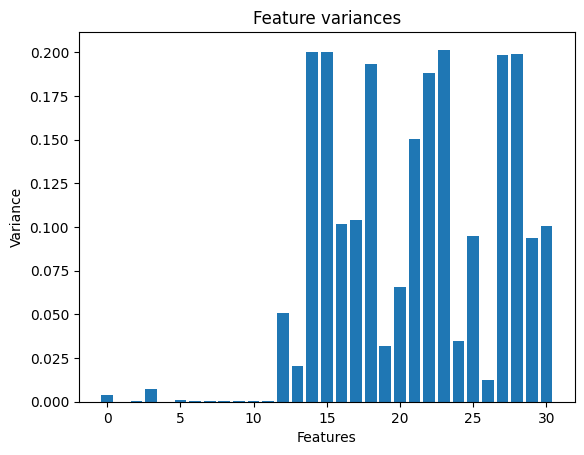

In [10]:
# Calculating variance of features.
featureVariances = np.var(train_X_minMaxed, axis=0)

# Plotting the feature variances as a bar chart
plt.bar(range(len(featureVariances)), featureVariances)
plt.title('Feature variances')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

In [11]:
print(featureVariances)

[3.92852549e-03 3.98879822e-05 2.97345308e-04 7.52357388e-03
 3.96935656e-05 7.82661671e-04 1.28920576e-04 1.38865036e-04
 1.39133845e-04 1.75292164e-04 3.57128640e-04 1.51665448e-04
 5.05554723e-02 2.01900716e-02 2.00080371e-01 2.00336829e-01
 1.01594642e-01 1.03895955e-01 1.93273354e-01 3.18788356e-02
 6.58321440e-02 1.50702073e-01 1.88269735e-01 2.01542640e-01
 3.50391220e-02 9.50861799e-02 1.22263384e-02 1.98298891e-01
 1.98975298e-01 9.35522817e-02 1.00696533e-01]


In [12]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.001)
train_X_selected = selector.fit_transform(train_X_minMaxed)
display(train_X_selected)
print(np.shape(train_X_selected))

array([[0.        , 0.        , 0.00196078, ..., 0.        , 0.05      ,
        0.        ],
       [0.        , 0.        , 0.02352941, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23921569, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.20392157, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.25098039, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07254902, ..., 1.        , 0.        ,
        0.        ]])

(25192, 21)


In [13]:
# Getting the indices of features that were selected via the VarianceThreshold function
selectorMask = selector.get_support()
selectedFeatureIndices = np.where(selectorMask)[0]
# print(selectedFeatureIndices)

# # Choosing the required features from the original unscaled data array
X_train_selected = train_X.iloc[:, selectedFeatureIndices]
print(np.shape(X_train_selected))

X_test_selected = test_X.iloc[:, selectedFeatureIndices]
print(np.shape(X_test_selected))

# Using the standard scaler to scale the selected data
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.fit_transform(X_test_selected)

(25192, 21)
(22544, 21)


In [14]:
from sklearn.svm import SVC

model_feature_selected = SVC(kernel='linear')
model_feature_selected.fit(X_train_selected_scaled, train_Y)

SVC(kernel='linear')

In [15]:
# Predicting the results for our test data.
preds_feature_selected = model_feature_selected.predict(X_test_selected_scaled)

# Calculating the accuracy score for our model's predictions
print(f'Accuracy score: {accuracy_score(test_Y, preds_feature_selected)*100:.2f}%')

Accuracy score: 73.55%


In [16]:
# Looking at some more metrics to see the model's performance
from sklearn.metrics import classification_report

print(classification_report(test_Y, preds_feature_selected, labels=model_feature_selected.classes_, zero_division=False))

              precision    recall  f1-score   support

      benign       0.64      0.93      0.76      9711
         dos       0.89      0.74      0.81      7636
       probe       0.89      0.79      0.83      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.74     22544
   macro avg       0.48      0.49      0.48     22544
weighted avg       0.67      0.74      0.69     22544



<span style="color:red">Insert your text answers below</span>.

### Observations:
- There is very little taken away from the accuracy score of the model when trained with 10 less (21 features) features than the originally trained SVC model.
- As we can see, the original's accuracy score is 73.66% while the model trained on selected features filtered based on variance has an accuracy of 73.55% which is just 0.11% worse.
- This proves that features having a very less variance has negligible impact on the training of a model.

### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features? 

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Using this so that I can keep a track of the progress. The loop seems to be taking a long time for my short attention span :p
from tqdm import tqdm

accuracyScores = []
kRange = range(1, np.shape(train_X)[1] + 1)
for k in tqdm(kRange):
    featureSelector = SelectKBest(f_classif, k=k)
    train_X_kBest = featureSelector.fit_transform(train_X, train_Y)
    test_X_kBest = featureSelector.transform(test_X)

    # Scaling the data so that it doesn't take hours to run
    train_X_kBest_scaled = scaler.fit_transform(train_X_kBest)
    test_X_kBest_scaled = scaler.fit_transform(test_X_kBest)

    # Training an SVM model
    model_kBest = SVC(kernel='linear')
    model_kBest.fit(train_X_kBest_scaled, train_Y)

    # Calculating the accuracy score for each iteration
    preds_kBest = model_kBest.predict(test_X_kBest_scaled)
    accuracy = accuracy_score(test_Y, preds_kBest)
    accuracyScores.append(accuracy)

100%|████████████████████████████████████████████| 31/31 [04:23<00:00,  8.51s/it]


Plotting the accuracy scores vs the number of features in a single plot

In [18]:
accuracyScoresRounded = [round(score* 100 , 2) for score in accuracyScores]
print(f'Accuracy scores: {accuracyScoresRounded}')

Accuracy scores: [62.58, 65.81, 65.35, 64.33, 64.96, 64.96, 65.52, 64.63, 54.45, 69.65, 68.85, 69.47, 71.07, 71.15, 71.15, 71.43, 71.59, 72.77, 72.76, 72.76, 72.84, 72.94, 73.35, 73.36, 73.58, 73.59, 73.6, 73.6, 73.56, 73.56, 73.66]


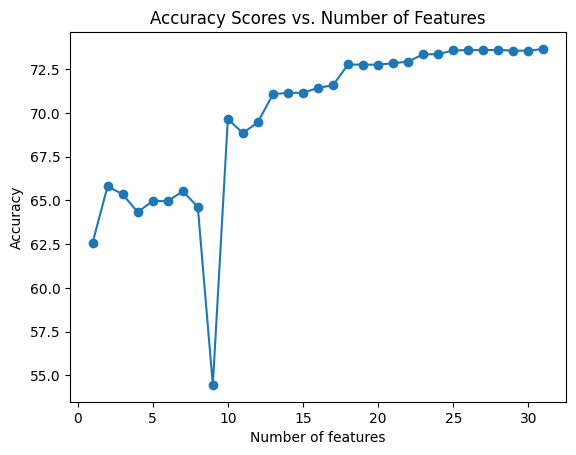

In [19]:
import matplotlib.pyplot as plt

plt.plot(kRange, accuracyScoresRounded, marker='o')
plt.title('Accuracy Scores vs. Number of Features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

<span style="color:red">Insert your question answers below</span>.

### Observations:
- Seeing that there is little difference in accuracy score from the run with 13 features upto that with the full set of 31 features, I would go with chosing around 18 features because that seems to have an accuracy close enough to the highest while also not having as many features.
- Best accuracy value here still is technically the run with all 31 features with a score of 73.66% which was the same score obtained from the SVM model used at the very beginning. However, in terms of actual "best", I would say it is either the model trained with 26-28 features as they have come the closest to the 73.66% mark while also not having to employ all of the features with accuracy scores of 73.59%, 73.6% and 73.6% respectively.
- An interesting point in the graph above is the model trained with 9 features. This has a stark decrease in accuracy compared to those having **lesser** and more number of features. Identifying this feature and further investigating its nature would be warranted as removing this might further improve accuracy if not used with the other features.

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [20]:
# Setting it so that we can view all the columns without it being condensed
pd.set_option('display.max_columns', None)

In [21]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

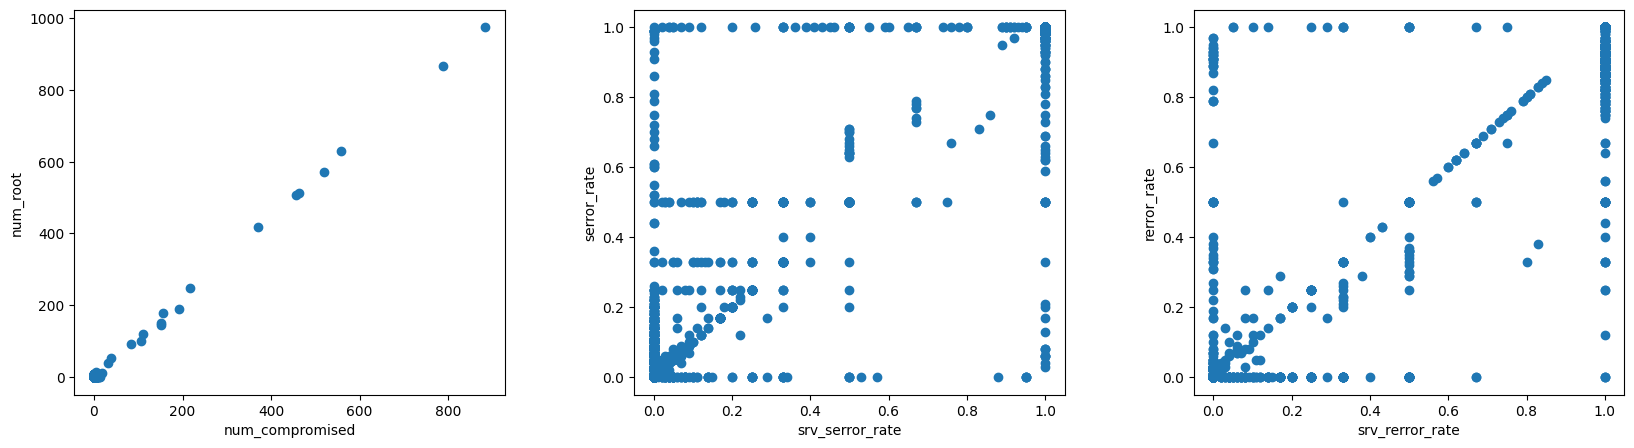

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

In [23]:
from sklearn.decomposition import PCA

####################################
pca_95 = PCA(n_components=0.95)
train_X_pca_95 = pca_95.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_95 = pca_95.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_95)[1]}')

Number of features reduced to 19


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

model_pca_95 = SVC(kernel='linear')
model_pca_95.fit(train_X_pca_95, train_Y)

preds_pca_95 = model_pca_95.predict(test_X_pca_95)
print(f'Accuracy score with PCA set to 95% variance: {accuracy_score(test_Y, preds_pca_95)*100:.2f}%')

Accuracy score with PCA set to 95% variance: 73.29%


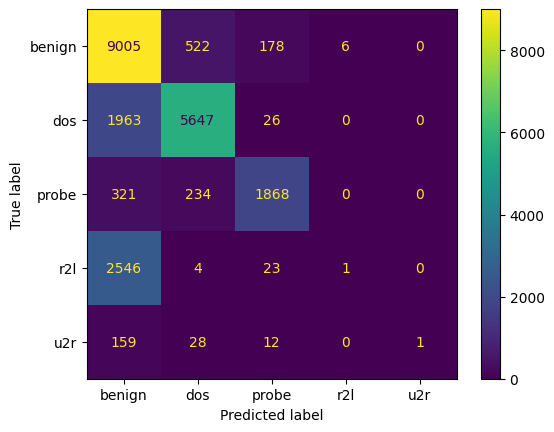

In [25]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_95 = confusion_matrix(test_Y, preds_pca_95, labels=model_pca_95.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_95, display_labels=model_pca_95.classes_)
disp.plot()
plt.show()

In [26]:
pca_99 = PCA(n_components=0.99)
train_X_pca_99 = pca_99.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_99 = pca_99.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_99)[1]}')

Number of features reduced to 23


In [27]:
model_pca_99 = SVC(kernel='linear')
model_pca_99.fit(train_X_pca_99, train_Y)

preds_pca_99 = model_pca_99.predict(test_X_pca_99)
print(f'Accuracy score with PCA set to 99% variance: {accuracy_score(test_Y, preds_pca_99)*100:.2f}%')

Accuracy score with PCA set to 99% variance: 73.58%


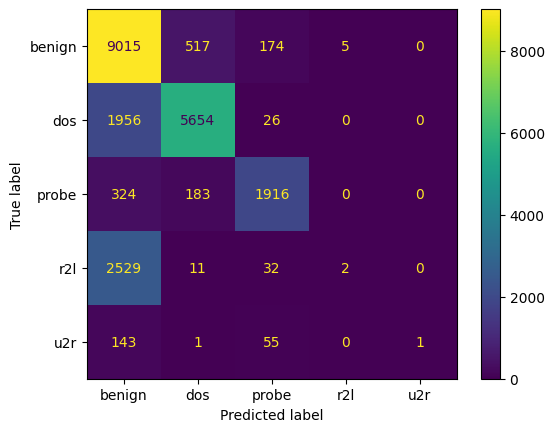

In [28]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_99 = confusion_matrix(test_Y, preds_pca_99, labels=model_pca_99.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_99, display_labels=model_pca_99.classes_)
disp.plot()
plt.show()

In [29]:
pca_999 = PCA(n_components=0.999)
train_X_pca_999 = pca_999.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_999 = pca_999.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_999)[1]}')

Number of features reduced to 28


In [30]:
model_pca_999 = SVC(kernel='linear')
model_pca_999.fit(train_X_pca_999, train_Y)

preds_pca_999 = model_pca_999.predict(test_X_pca_999)
print(f'Accuracy score with PCA set to 99.9% variance: {accuracy_score(test_Y, preds_pca_999)*100:.2f}%')

Accuracy score with PCA set to 99.9% variance: 73.55%


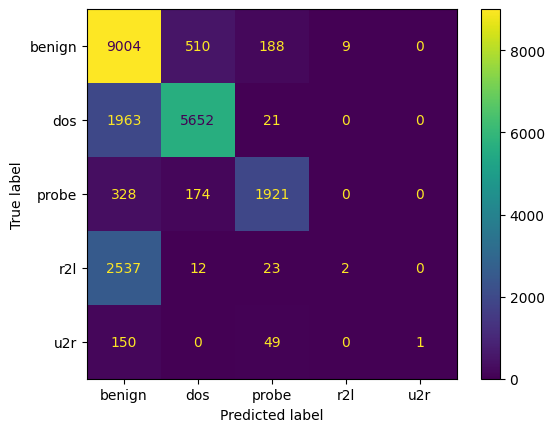

In [31]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_999 = confusion_matrix(test_Y, preds_pca_999, labels=model_pca_999.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_999, display_labels=model_pca_999.classes_)
disp.plot()
plt.show()

In [32]:
pca_90 = PCA(n_components=0.90)
train_X_pca_90 = pca_90.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_90 = pca_90.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_90)[1]}')

Number of features reduced to 16


In [33]:
model_pca_90 = SVC(kernel='linear')
model_pca_90.fit(train_X_pca_90, train_Y)

preds_pca_90 = model_pca_90.predict(test_X_pca_90)
print(f'Accuracy score with PCA set to 90% variance: {accuracy_score(test_Y, preds_pca_90)*100:.2f}%')

Accuracy score with PCA set to 90% variance: 72.70%


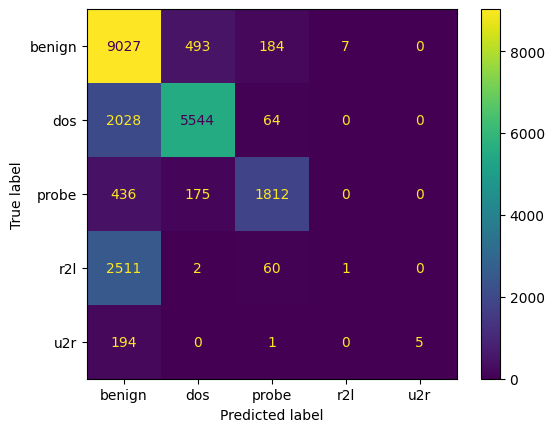

In [34]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_90 = confusion_matrix(test_Y, preds_pca_90, labels=model_pca_90.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_90, display_labels=model_pca_90.classes_)
disp.plot()
plt.show()

In [35]:
pca_88 = PCA(n_components=0.88)
train_X_pca_88 = pca_88.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_88 = pca_88.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_88)[1]}')

Number of features reduced to 15


In [36]:
model_pca_88 = SVC(kernel='linear')
model_pca_88.fit(train_X_pca_88, train_Y)

preds_pca_88 = model_pca_88.predict(test_X_pca_88)
print(f'Accuracy score with PCA set to 88% variance: {accuracy_score(test_Y, preds_pca_88)*100:.2f}%')

Accuracy score with PCA set to 88% variance: 72.70%


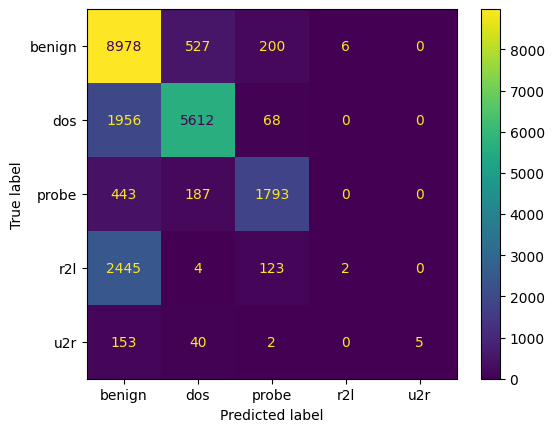

In [37]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_88 = confusion_matrix(test_Y, preds_pca_88, labels=model_pca_88.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_88, display_labels=model_pca_88.classes_)
disp.plot()
plt.show()

In [38]:
pca_69 = PCA(n_components=0.69)
train_X_pca_69 = pca_69.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_69 = pca_69.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_69)[1]}')

Number of features reduced to 9


In [39]:
model_pca_69 = SVC(kernel='linear')
model_pca_69.fit(train_X_pca_69, train_Y)

preds_pca_69 = model_pca_69.predict(test_X_pca_69)
print(f'Accuracy score with PCA set to 69% variance: {accuracy_score(test_Y, preds_pca_69)*100:.2f}%')

Accuracy score with PCA set to 69% variance: 72.03%


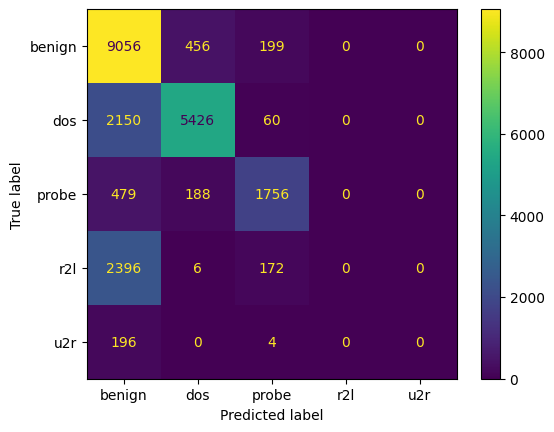

In [40]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_69 = confusion_matrix(test_Y, preds_pca_69, labels=model_pca_69.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_69, display_labels=model_pca_69.classes_)
disp.plot()
plt.show()

In [41]:
pca_20 = PCA(n_components=0.20)
train_X_pca_20 = pca_20.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_20 = pca_20.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_20)[1]}')

Number of features reduced to 1


In [42]:
model_pca_20 = SVC(kernel='linear')
model_pca_20.fit(train_X_pca_20, train_Y)

preds_pca_20 = model_pca_20.predict(test_X_pca_20)
print(f'Accuracy score with PCA set to 20% variance: {accuracy_score(test_Y, preds_pca_20)*100:.2f}%')

Accuracy score with PCA set to 20% variance: 65.88%


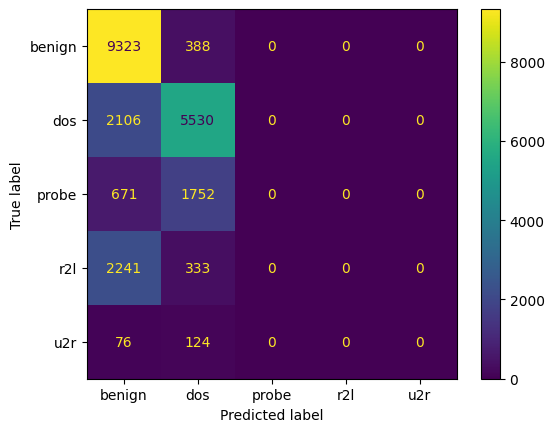

In [43]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_20 = confusion_matrix(test_Y, preds_pca_20, labels=model_pca_20.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_20, display_labels=model_pca_20.classes_)
disp.plot()
plt.show()

In [44]:
pca_50 = PCA(n_components=0.50)
train_X_pca_50 = pca_50.fit_transform(train_X_scaled) # using the scaled data variable from task 1 since we're working on the same dataset.
test_X_pca_50 = pca_50.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_pca_50)[1]}')

Number of features reduced to 4


In [45]:
model_pca_50 = SVC(kernel='linear')
model_pca_50.fit(train_X_pca_50, train_Y)

preds_pca_50 = model_pca_50.predict(test_X_pca_50)
print(f'Accuracy score with PCA set to 50% variance: {accuracy_score(test_Y, preds_pca_50)*100:.2f}%')

Accuracy score with PCA set to 50% variance: 71.99%


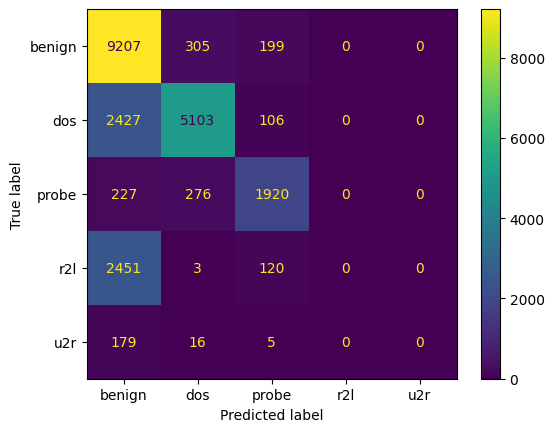

In [46]:
# Generating the confusion matrix for our predictions
confusion_matrix_pca_50 = confusion_matrix(test_Y, preds_pca_50, labels=model_pca_50.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_pca_50, display_labels=model_pca_50.classes_)
disp.plot()
plt.show()

<span style="color:red">Insert your text answers below</span>.

## Observations:

#### 1. How many new features are there after the PCA?
After the first PCA run (variance of 95%), the data was reduced to having 19 features.  

#### 2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
This model has a slightly lesser accuracy than the first model we trained without any dimensionality/feature reduction of any kind of 73.29% as opposed to 73.66%. However, this model with a reduced feature set of 19 actually managed to correctly classify **one** u2r incident where the model with the "best accuracy" had **zero correct** predictions as we can see from both their confusion matrices.

#### 3. How about if we set the variance to 99%? And how about 99.9%?
- When setting the variance to 99%, it has an accuracy of 73.58% which is slightly higher than when setting variance to 99.9% with an accuracy score of 73.55%.
- The 99% variance version of the model was trained on a reduced feature set of 23 and just the .9%% increase in variance was enough to increase the features by a number of 5 to 28.

#### 4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?
**Absolutely!** Since PCA is essentially trying to correlate and statistically combine aspects of multiple individual features into a reduced feature set or _"Principal Components"_, it can reduce the number of features this way to a large extent and still maintain an accuracy score close to the model that uses all of the features. In the very last run with a variance set to 50%, we can see that the PCA reduced it to just 4 features which still managed to have an accuracy score of 71.99% which is very impressive considering that we had 31 features for the model with best accuracy score of 73.66%. This is **just a 1.67% difference** which could be significant in some cases but is still impressive nonetheless.

# Task 3: Exploration

## A quick discussion on why feature engineering is important.
The ML workflow is not just taking data, training a model and then deploying it after testing for accuracy. There are multiple steps along the way which includes preparing the data in such a way that it can be made use of fully and efficiently during training. This is where the step of feature engineering comes into the picture. This is usually done after data is cleaned and normalised. Here are some of the clear advantages in performing this step before proceeding to training a model that I have understood:

- **It reduces computational complexity.** Lesser the complexity of the data to train on usually means lesser computational complexity as well and more efficiency which is really important considering that the sizes of data sets on which large models (*~cough cough~ LLMs/GPT* ) have been growing exponentially.
- **The data becomes more interpretable.** Since we are trying to select features that impact the outcome/classes the most, we are gaining insights into the underlying relationships between the features and the target variable. This is useful because we would have an idea about what impacts a model's decision and why it made certain choices. This also means we could have better ways to improve model accuracy by fixing any flaws/improving quality in the part of the data that actually matters.
- **Potential reduction in overfitting.** Since we're selecting features that are most relevant to the classification task, we would be reducing the risk of overfitting because we are eliminating part of the data that may not be fully relevant and may not be what the trained model was used to when it sees new data.
- **Improvement of model accuracy.** It is intuitive to think that by having only features that affect the classification, accuracy should also increase for model trained on a data set that has been well moulded to have only relevant features.

## Exploration on a different dimensionality reduction approach

There are many other methods that one can follow when it comes to feature engineering. One such different technique I read about during my exploration was the Linear Discriminant Analysis (LDA).  

### Linear Discriminant Analysis (LDA):
The LDA method finds the direction that best maximises the separability among classes in the data. It does this by maximising the ratio of the "between-class scatter" (how far apart the different classes of data points are) to the "within-class scatter" (how far apart the data points within a class are). This ratio is called the ***Fisher criterion***.  
  
It reduces the feature space in a data set to a number that can be calculated as $C - 1$ where "C" is the number of classes. So, in our example data set, it would reduce the 31 features to 4 since we have 5 classes.  
  
Another interesting thing I read about is that it is common for PCA to be applied on a data set to reduce the feature set based on variance and then to pipe this into LDA which further reduces the feature space. This is said to improve model accuracy. Lets try this with our data set above on which we'd implemented PCA with variance of 90%.

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Applying LDA on the training and testing data set that has been reduced by PCA
lda = LinearDiscriminantAnalysis()
train_X_lda = lda.fit_transform(train_X_pca_90, train_Y)
test_X_lda = lda.transform(test_X_pca_90)
print(f'Number of features reduced to {np.shape(train_X_lda)[1]}')

Number of features reduced to 4


In [67]:
model_lda = SVC(kernel='linear')
model_lda.fit(train_X_lda, train_Y)

preds_lda = model_lda.predict(test_X_lda)
print(f'Accuracy score with PCA (variance 90%) and LDA: {accuracy_score(test_Y, preds_lda)*100:.2f}%')

Accuracy score with PCA (variance 90%) and LDA: 72.40%


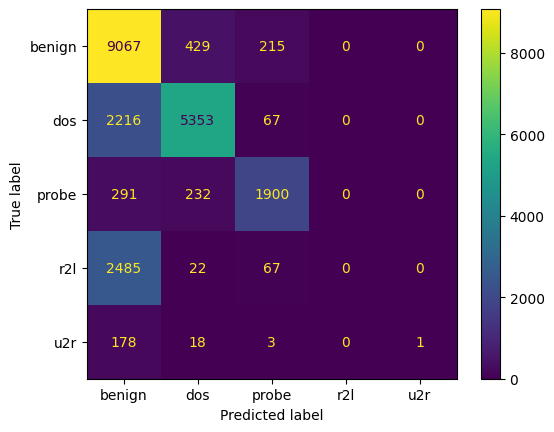

In [68]:
# Generating the confusion matrix for our predictions
confusion_matrix_lda = confusion_matrix(test_Y, preds_lda, labels=model_lda.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lda, display_labels=model_lda.classes_)
disp.plot()
plt.show()

The model trained on a feature set additionally reduced by LDA actually performs marginally worse with an accuracy score of 72.4% than when done with just PCA which had an accuracy of 72.7%. Let's try with just LDA and no PCA processing before.

In [78]:
train_X_lda_no_pca = lda.fit_transform(train_X_scaled, train_Y)
test_X_lda_no_pca = lda.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_lda_no_pca)[1]}')

Number of features reduced to 4


In [79]:
model_lda_no_pca = SVC(kernel='linear')
model_lda_no_pca.fit(train_X_lda_no_pca, train_Y)

preds_lda_no_pca = model_lda_no_pca.predict(test_X_lda_no_pca)
print(f'Accuracy score with just LDA: {accuracy_score(test_Y, preds_lda_no_pca)*100:.2f}%')

Accuracy score with just LDA: 72.03%


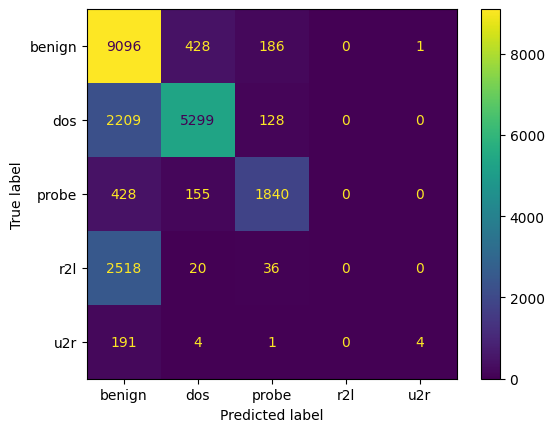

In [80]:
# Generating the confusion matrix for our predictions
confusion_matrix_lda_no_pca = confusion_matrix(test_Y, preds_lda_no_pca, labels=model_lda_no_pca.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lda_no_pca, display_labels=model_lda_no_pca.classes_)
disp.plot()
plt.show()

This accuracy of 72.03% is still slightly worse than the best accuracy score obtained before with just PCA which was 73.58%. Lets experiment with the n_component values.

In [83]:
lda_3 = LinearDiscriminantAnalysis(n_components=3)
train_X_lda_3 = lda_3.fit_transform(train_X_scaled, train_Y)
test_X_lda_3 = lda_3.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_lda_3)[1]}')

Number of features reduced to 3


In [84]:
model_lda_3 = SVC(kernel='linear')
model_lda_3.fit(train_X_lda_3, train_Y)

preds_lda_3 = model_lda_3.predict(test_X_lda_3)
print(f'Accuracy score with just LDA: {accuracy_score(test_Y, preds_lda_3)*100:.2f}%')

Accuracy score with just LDA: 72.11%


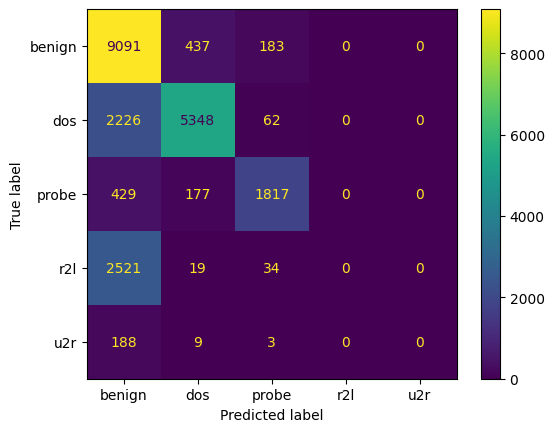

In [85]:
# Generating the confusion matrix for our predictions
confusion_matrix_lda_3 = confusion_matrix(test_Y, preds_lda_3, labels=model_lda_3.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lda_3, display_labels=model_lda_3.classes_)
disp.plot()
plt.show()

In [86]:
lda_2 = LinearDiscriminantAnalysis(n_components=2)
train_X_lda_2 = lda_2.fit_transform(train_X_scaled, train_Y)
test_X_lda_2 = lda_2.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_lda_2)[1]}')

Number of features reduced to 2


In [87]:
model_lda_2 = SVC(kernel='linear')
model_lda_2.fit(train_X_lda_2, train_Y)

preds_lda_2 = model_lda_2.predict(test_X_lda_2)
print(f'Accuracy score with just LDA: {accuracy_score(test_Y, preds_lda_2)*100:.2f}%')

Accuracy score with just LDA: 71.99%


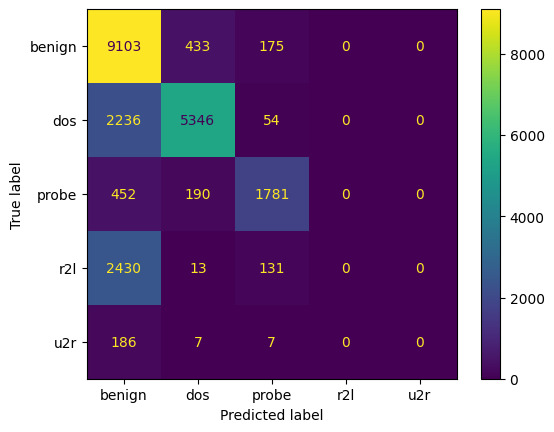

In [88]:
# Generating the confusion matrix for our predictions
confusion_matrix_lda_2 = confusion_matrix(test_Y, preds_lda_2, labels=model_lda_2.classes_)

# Plotting the confusion matrix instead of printing it as a 2D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lda_2, display_labels=model_lda_2.classes_)
disp.plot()
plt.show()

In [89]:
lda_1 = LinearDiscriminantAnalysis(n_components=1)
train_X_lda_1 = lda_1.fit_transform(train_X_scaled, train_Y)
test_X_lda_1 = lda_1.transform(test_X_scaled)
print(f'Number of features reduced to {np.shape(train_X_lda_1)[1]}')

Number of features reduced to 1


In [90]:
model_lda_1 = SVC(kernel='linear')
model_lda_1.fit(train_X_lda_1, train_Y)

preds_lda_1 = model_lda_1.predict(test_X_lda_1)
print(f'Accuracy score with just LDA: {accuracy_score(test_Y, preds_lda_1)*100:.2f}%')

Accuracy score with just LDA: 64.98%


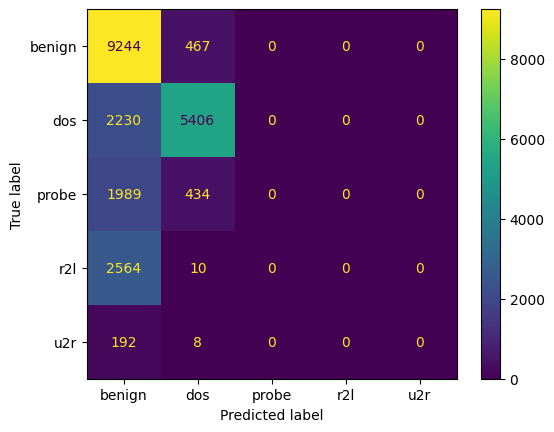

In [91]:
# Generating the confusion matrix for our predictions
confusion_matrix_lda_1 = confusion_matrix(test_Y, preds_lda_1, labels=model_lda_1.classes_)

# Plotting the confusion matrix instead of printing it as a 1D array so that it is easier to discern
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lda_1, display_labels=model_lda_1.classes_)
disp.plot()
plt.show()

Interestingly, it looks like having a feature space of 3 is better compared to when having 4 or less than 3.  

## Conclusion:
Our experimentation with LDA on the given data set doesn't seem to have resulted in a better performance in terms of accuracy. In fact, it is slightly lower than when trained on just the PCA reduced feature set. However, this may not be the case for other data sets. It could be that this data set isn't that much linearly separable. Perhaps future exploration can include trying to do dimensionality reduction in a non-linear space.

#### References:
1. [Is LDA a dimensionality reduction technique or a classifier algorithm? | Towards Data Science](https://towardsdatascience.com/is-lda-a-dimensionality-reduction-technique-or-a-classifier-algorithm-eeed4de9953a#:~:text=Linear%20Discriminant%20Analysis%20also%20works,features%20to%20only%202%20features.)
2. [Fisher's Optimization Criterion | Penn State University - Stat 508 Applied Data Mining and Statistical Learning](https://online.stat.psu.edu/stat508/lesson/fishersoptimizationcriterion#:~:text=Fisher%27s%20optimization%20criterion%3A%20the%20projected,.%20%2C%20ap)